###Step 1: Import the libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error


###Step 2: Load the dataset

In [2]:
data = pd.read_csv('/content/Salary Data.csv')
print(data.head())
print(data.tail())

    Age  Gender Education Level          Job Title  Years of Experience  \
0  32.0    Male      Bachelor's  Software Engineer                  5.0   
1  28.0  Female        Master's       Data Analyst                  3.0   
2  45.0    Male             PhD     Senior Manager                 15.0   
3  36.0  Female      Bachelor's    Sales Associate                  7.0   
4  52.0    Male        Master's           Director                 20.0   

     Salary  
0   90000.0  
1   65000.0  
2  150000.0  
3   60000.0  
4  200000.0  
      Age  Gender Education Level                      Job Title  \
370  35.0  Female      Bachelor's       Senior Marketing Analyst   
371  43.0    Male        Master's         Director of Operations   
372  29.0  Female      Bachelor's         Junior Project Manager   
373  34.0    Male      Bachelor's  Senior Operations Coordinator   
374  44.0  Female             PhD        Senior Business Analyst   

     Years of Experience    Salary  
370                

In [3]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Gender               373 non-null    object 
 2   Education Level      373 non-null    object 
 3   Job Title            373 non-null    object 
 4   Years of Experience  373 non-null    float64
 5   Salary               373 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.7+ KB
None


###Step 3: Feature Extraction

In [6]:
X = data.drop(columns=["Salary"])#everything else except salary - the features
y = data['Salary']  #this is what we want to predict - the target

###Step 4: Split into training and testing sets

In [9]:
X_train, X_test, y_train, y_test= train_test_split (X, y, test_size = 0.2, random_state = 42)

###Step 5: Pre-processing

In [11]:
# Identify column types
numeric_features = X.select_dtypes(include=["int64", "float64"]).columns
categorical_features = X.select_dtypes(include=["object"]).columns

# Apply scaling to numbers, one-hot encoding to text
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_features),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features),
    ]
)
#Age, YearsExperience → scaled
#Gender, Education → encoded

In [14]:
# Check missing values
print(X.isnull().sum())

Age                    2
Gender                 2
Education Level        2
Job Title              2
Years of Experience    2
dtype: int64


In [15]:
X_clean = X.dropna(axis=1)

###Step 6: Build a pipeline with linear regression

In [18]:
model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", LinearRegression())
])

# Drop rows with missing values from both X_train and y_train
X_train_cleaned = X_train.dropna()
y_train_cleaned = y_train[X_train_cleaned.index]

# Train the model
model.fit(X_train_cleaned, y_train_cleaned)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['Age', 'Years of Experience'], dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['Gender', 'Education Level', 'Job Title'], dtype='object'))])),
                ('regressor', LinearRegression())])

###Step 7: Make predictions

In [24]:
# Drop rows with missing values from X_test for prediction
X_test_cleaned = X_test.dropna()

y_pred = model.predict(X_test_cleaned)
print("predicted_salaries:", y_pred[:5])

predicted_salaries: [140227.19900032  99514.9241732  120375.31447845  99999.84967253
 131159.77532523]


In [26]:
print(len(y_pred), len(X_test_cleaned))

74 74


###Step 8: Evaluate the model

In [28]:
# Drop corresponding rows from y_test to match X_test_cleaned
y_test_cleaned = y_test[X_test_cleaned.index]

r2 = r2_score(y_test_cleaned, y_pred)
mse = mean_squared_error(y_test_cleaned, y_pred)
mae = mean_absolute_error(y_test_cleaned, y_pred)

print("R² Score:", r2)
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)

R² Score: 0.851991812387623
Mean Squared Error: 363393075.3854796
Mean Absolute Error: 12318.005514384467


###Step 9: Plotting Actual vs Predicted

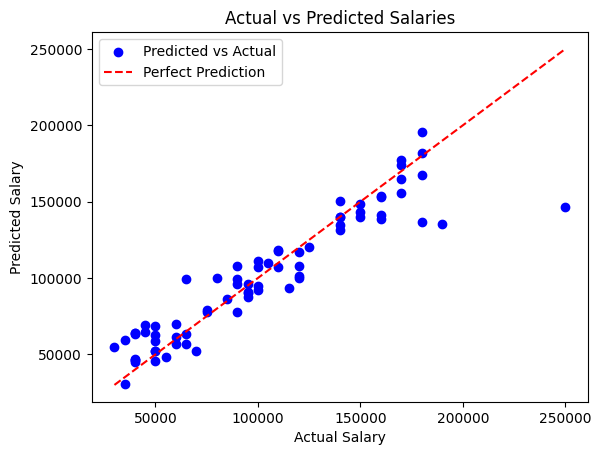

In [33]:
plt.scatter(y_test_cleaned, y_pred, color="blue", label="Predicted vs Actual")

# Add a perfect prediction line
max_val = max(max(y_test_cleaned), max(y_pred))  # get the max value for the line
min_val = min(min(y_test_cleaned), min(y_pred))  # get the min value for the line
plt.plot([min_val, max_val], [min_val, max_val], color="red", linestyle="--", label="Perfect Prediction")

plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.title("Actual vs Predicted Salaries")
plt.legend()
plt.show()

###Step 10: New predictions

In [36]:
import pandas as pd

# Example new employee data - Including all columns used in training
new_employee = pd.DataFrame({
    "Age": [30.0],
    "Gender": ["Male"],
    "Education Level": ["Bachelor's"],
    "Job Title": ["Software Engineer"],
    "Years of Experience": [5.0]
})
predicted_salary = model.predict(new_employee)
print("Predicted Salary:", predicted_salary[0])

Predicted Salary: 73029.80703135235


In [37]:
import pandas as pd

# Example new employee data - Including all columns used in training
new_employee = pd.DataFrame({
    "Age": [50.0],
    "Gender": ["Female"],
    "Education Level": ["PhD"],
    "Job Title": ["Software Engineer"],
    "Years of Experience": [15.0]
})
predicted_salary = model.predict(new_employee)
print("Predicted Salary:", predicted_salary[0])

Predicted Salary: 144031.9457436029
